# Практическая работа №5

## Выполнил студент группы ББМО-01-23 Бакин Д.И.




### Шаг 1. Загрузка обученной модели и данных MNIST

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Загрузка тестовых данных
(_, _), (test_images, test_labels) = mnist.load_data()

# Нормализация данных
test_images = test_images / 255.0

# Преобразование меток в формат one-hot
test_labels = to_categorical(test_labels, num_classes=10)

# Загрузка обученной модели
model = tf.keras.models.load_model('/content/mnist_model.h5')

# Проверка точности модели на обычных данных
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy on clean images: {test_acc}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9715 - loss: 0.0998
Test accuracy on clean images: 0.9754999876022339


###Шаг 2: Реализация атаки PGD

In [2]:
!pip install foolbox


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.2 MB/s eta 0:00:00


Точность модели на чистых данных: 97.55%
Точность модели после атаки: 8.57%


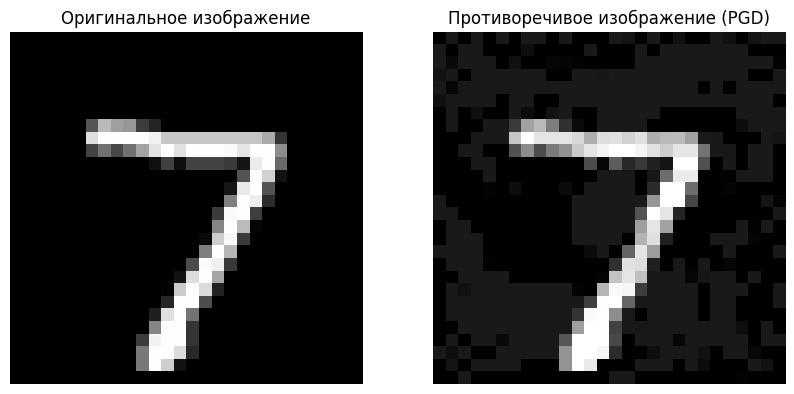

In [28]:
import torch
import torch.nn as nn
import foolbox as fb
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Инициализация Foolbox модели
fmodel = fb.TensorFlowModel(model, bounds=(0, 1))

# Функция для оценки точности модели
def evaluate_accuracy(model, images, labels):
    preds = model(images).numpy()
    preds = np.argmax(preds, axis=1)
    return np.mean(preds == labels)

# Подготовка тестовых данных
test_images_tf = tf.convert_to_tensor(test_images, dtype=tf.float32)
test_labels_np = np.argmax(test_labels, axis=1)

# Оценка точности до атаки
clean_accuracy = evaluate_accuracy(fmodel, test_images_tf, test_labels_np)
print(f"Точность модели на чистых данных: {clean_accuracy * 100:.2f}%")

# Параметры атаки
attack = fb.attacks.LinfPGD()
epsilons = 0.1

# Применение атаки на всем тестовом наборе
advs, _, success = attack(fmodel, test_images_tf, test_labels_np, epsilons=epsilons)

# Оценка точности после атаки
adversarial_accuracy = evaluate_accuracy(fmodel, advs, test_labels_np)
print(f"Точность модели после атаки: {adversarial_accuracy * 100:.2f}%")

# Пример вывода одного изображения до и после атаки
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Оригинальное изображение")
plt.imshow(test_images[0], cmap="gray")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Противоречивое изображение (PGD)")
plt.imshow(advs[0].numpy(), cmap="gray")
plt.axis('off')

plt.show()

#Вывод:
Как види, точность снизилась с 97,55% до 8,57%, что показывает на уязвимость модели.